# Spaceship Titanic

# Project Goal 
> To predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly.

# Project Description
> In the "Dimensional Travel Prediction for Spaceship Titanic" competition, participants are tasked with creating predictive models to determine whether a passenger was transported to an alternate dimension during the catastrophic collision of the Spaceship Titanic with a spacetime anomaly. The competition provides participants with a dataset containing personal records recovered from the ship's damaged computer system.

# Initial Hypotheses
> I believe that a passengers VIP status with be the most highly weighted towards Transported.

# Imports

In [1]:
import wrangle
import pandas as pd
from sklearn.preprocessing import RobustScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as stats

# Acquire
> * Data acquired from: https://www.kaggle.com/competitions/spaceship-titanic/data

In [2]:
# Import File
df = pd.read_csv('train.csv')

# Prepare
> * filled nulls with mean in all float64 columns

> * dropped Cabin column because there were too many unique strings

> * dropped nulls in RoomService becuse it was 181 rows
> * dropped nulls in vip because it was only 203 samples
> * dropped nulls in Destination because it was only 182 samples
> * dropped nulls in CryoSleep because it was only 217 samples

> * dropped nulls because it only accounted for 201 out of 8693 rows.
> * dropped the name column because we have passenger id

> * converted converted the boolean values of 'VIP', 'CryoSleep', 'Transported' to 0 or 1

> * encoded homeplannet because it was catagorical then dropped homeplannet column
> * encoded destination 

In [3]:
# Prepared the data
df = wrangle.prepare_data(df)

In [4]:
# A brief look at the data
df.head()

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0001_01,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,1
1,0002_01,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,1,0,0,0,0,1
2,0003_01,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0,1,0,0,0,1
3,0003_02,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0,1,0,0,0,1
4,0004_01,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,1,0,0,0,0,1


In [5]:
# Splitting my data
X_train, X_test, y_train, y_test = wrangle.split_data(df)

In [6]:
# Scaled my data
X_train_scaled = wrangle.scale_data(X_train)
X_test_scaled = wrangle.scale_data(X_test)

# Univariate Analysis
> For the First iteration I decided to not get rid of outliers an use a robust scaler
because I wanted to include the vips

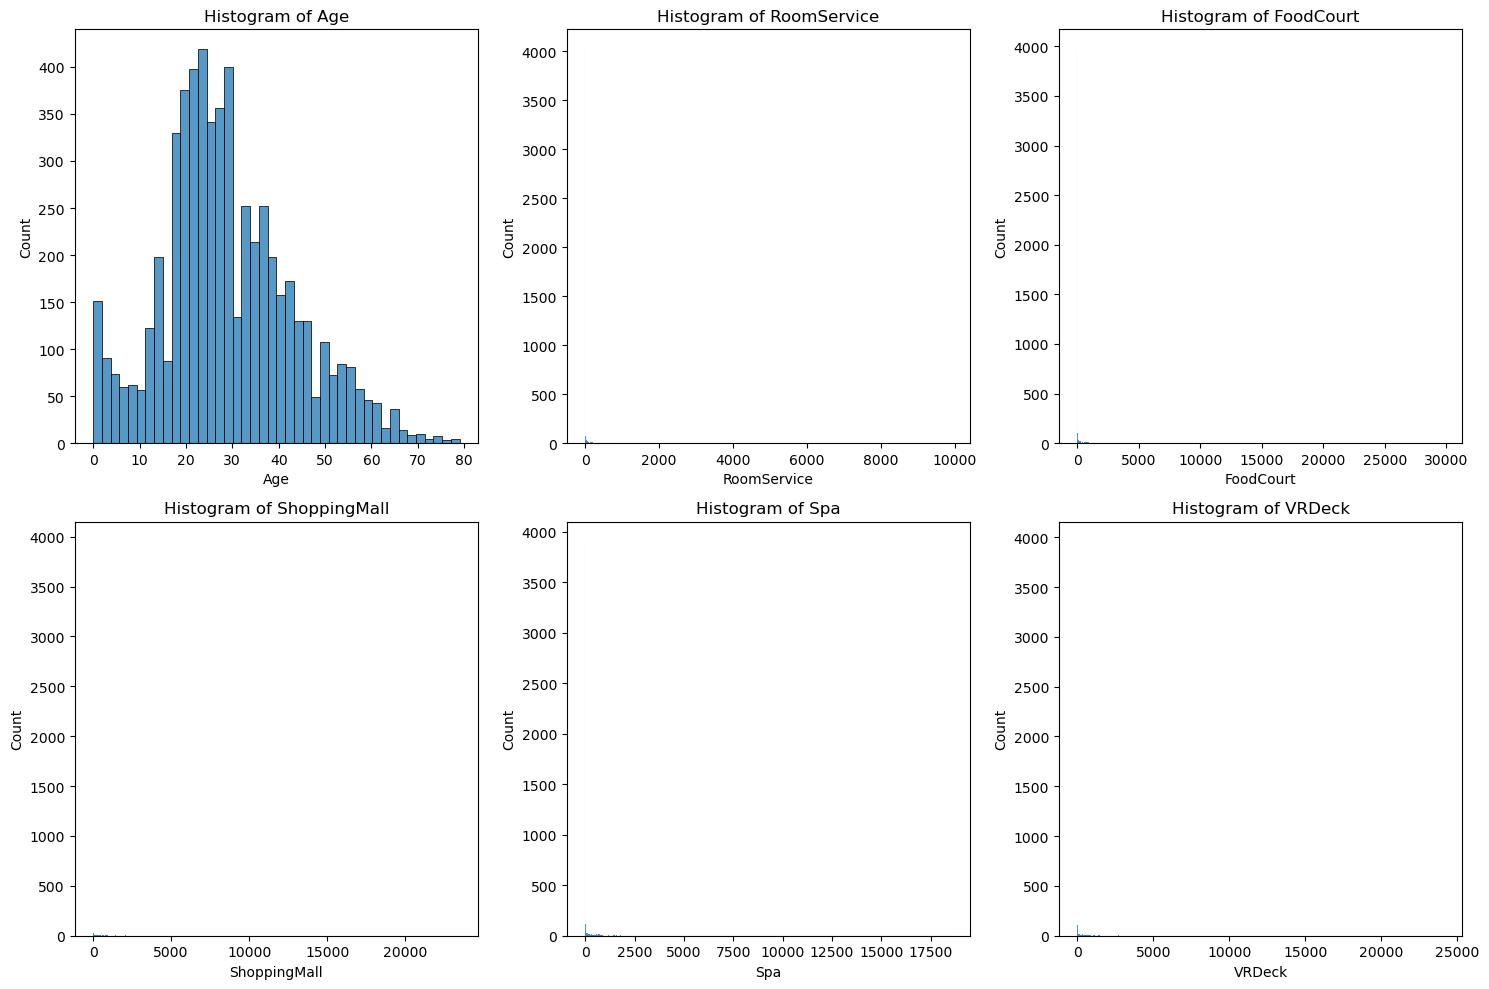

In [7]:
# Shows histplots of my data
wrangle.new_visual_univariate_findings(X_train)

# Bivariate Exploration

> ## Visualizations of categorical feature to Transported

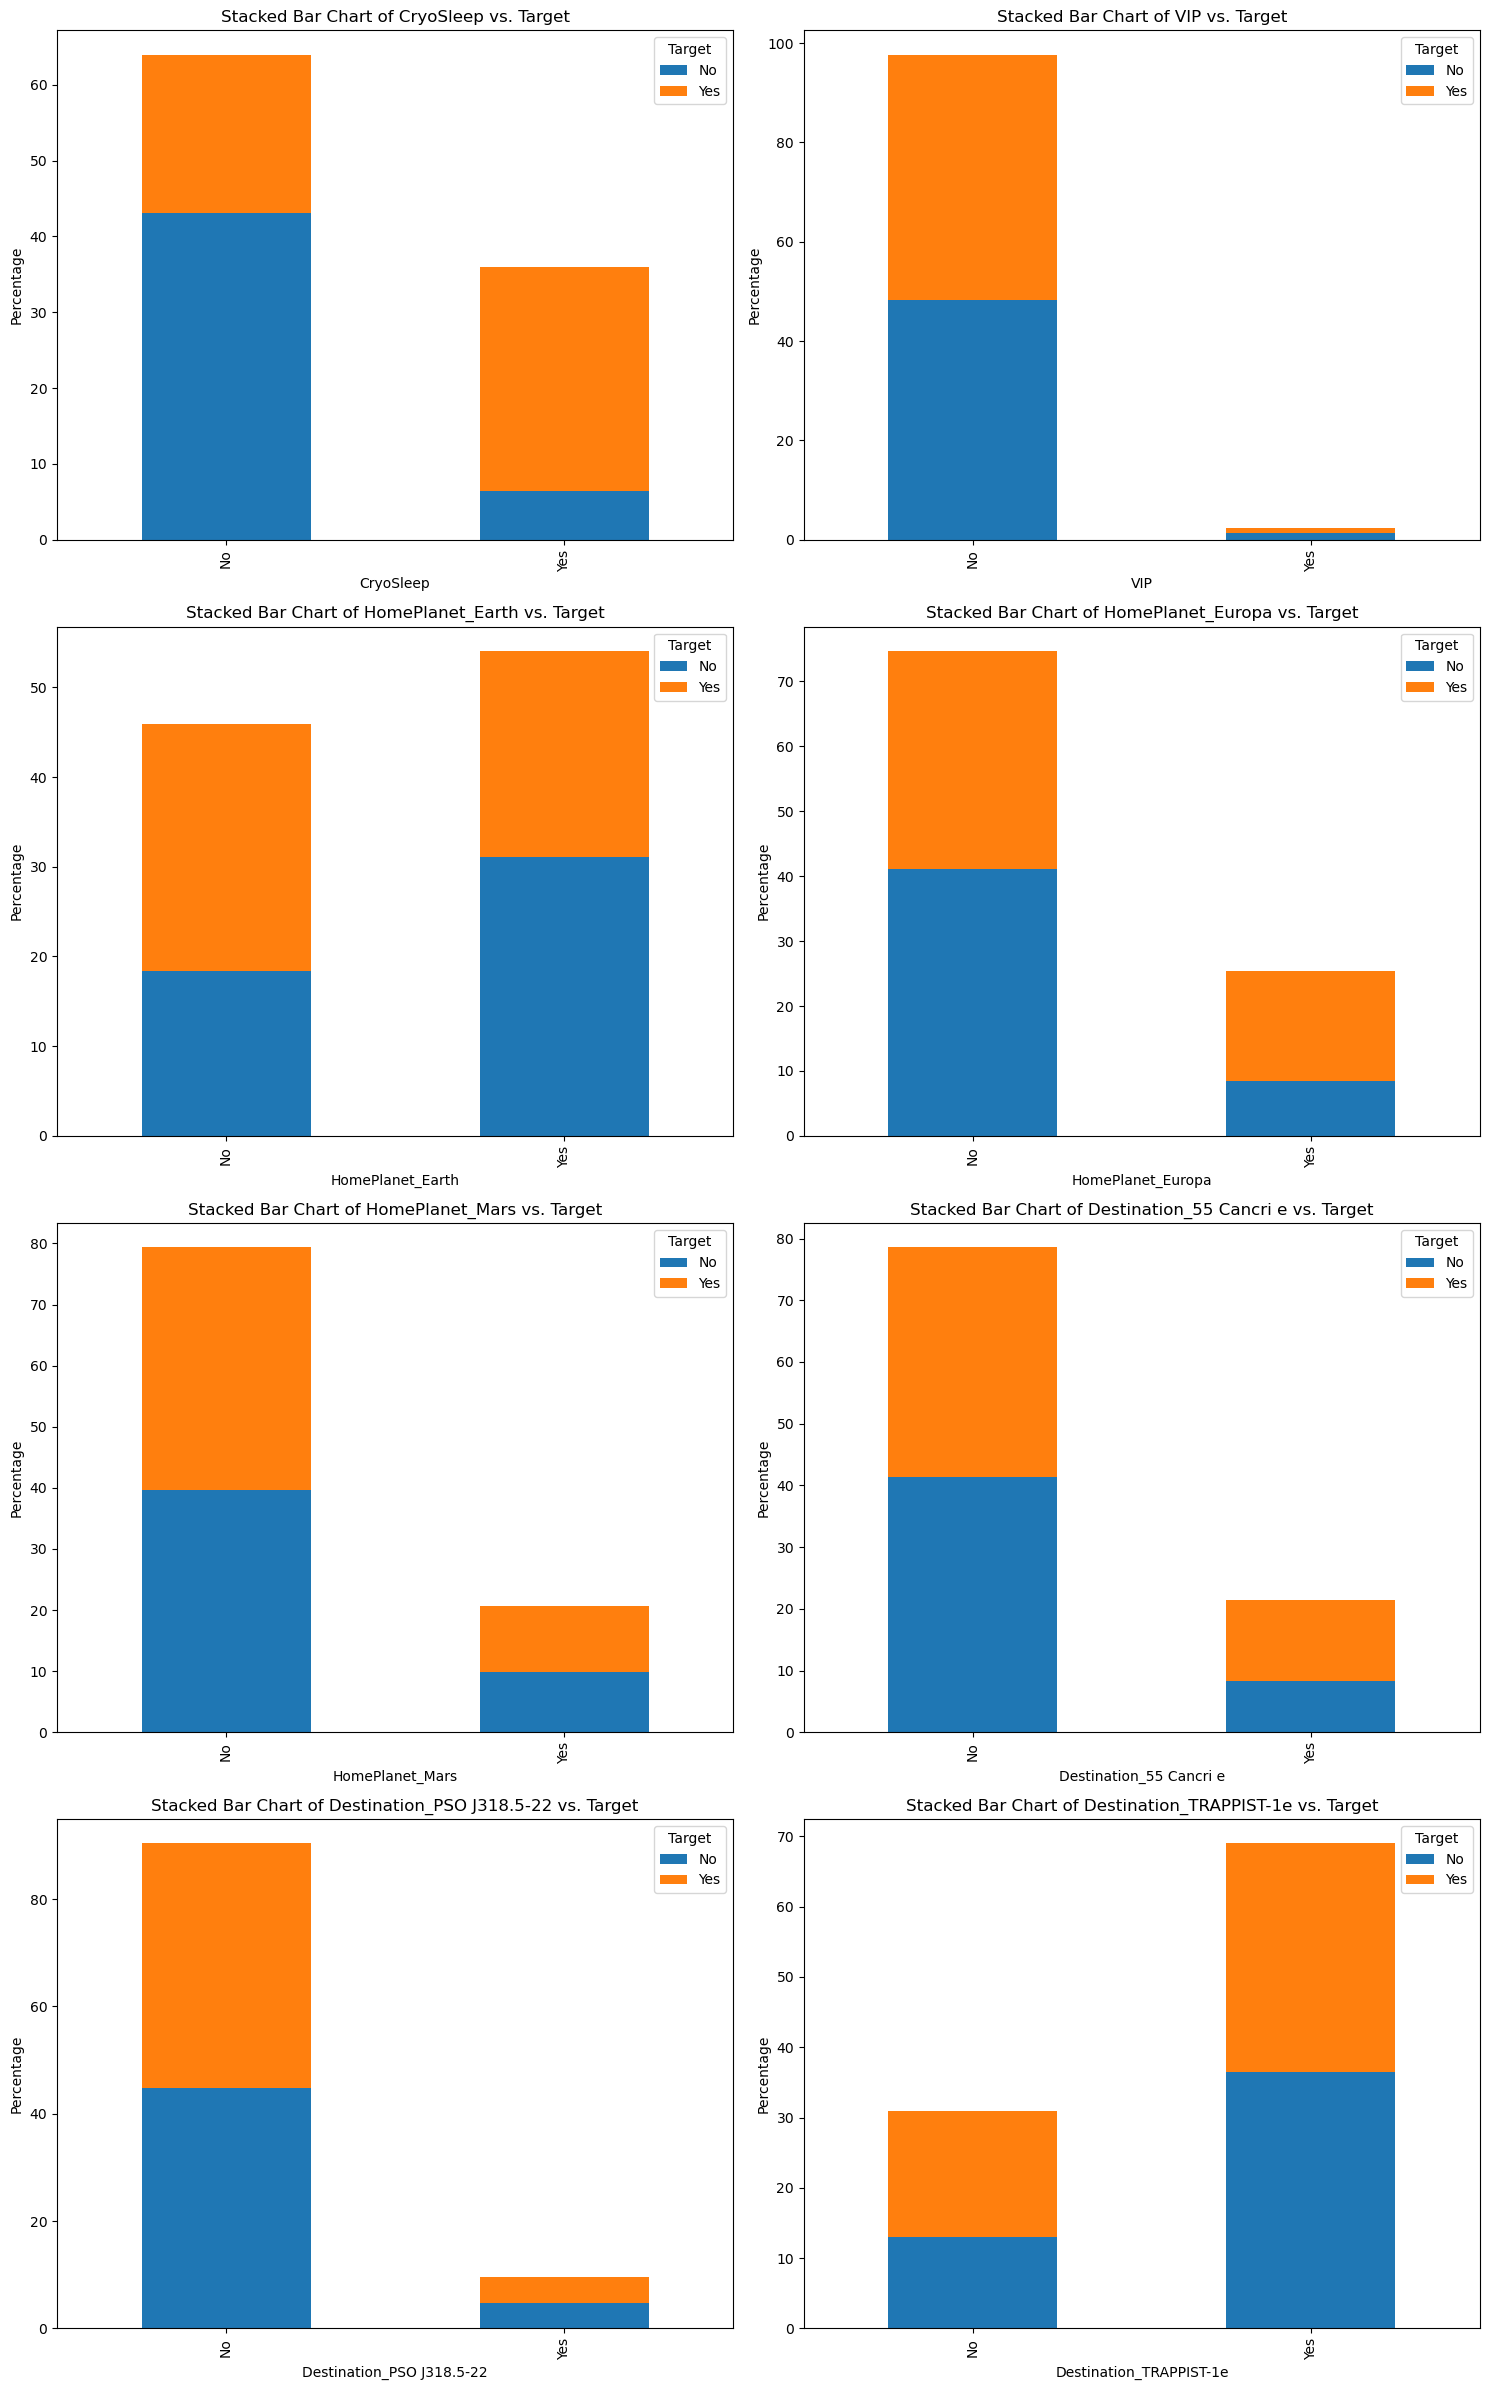

In [8]:
wrangle.percentages_visuals(X_train, y_train)

In [9]:
wrangle.get_percentages(X_train, y_train)

Percent chance of being transported if homeworld was mars 51.88
Percent chance of being transported if homeworld was europa 66.44
Percent chance of being transported if homeworld was earth 42.44


In [10]:
wrangle.destination(X_train, y_train)

Percent chance of being transported if Destination_55 Cancri e 61.43
Percent chance of being transported if Destination_PSO J318.5-22 50.45
Percent chance of being transported if Destination_TRAPPIST-1e 47.07


> ## Visualizations of Transported to various continuous features

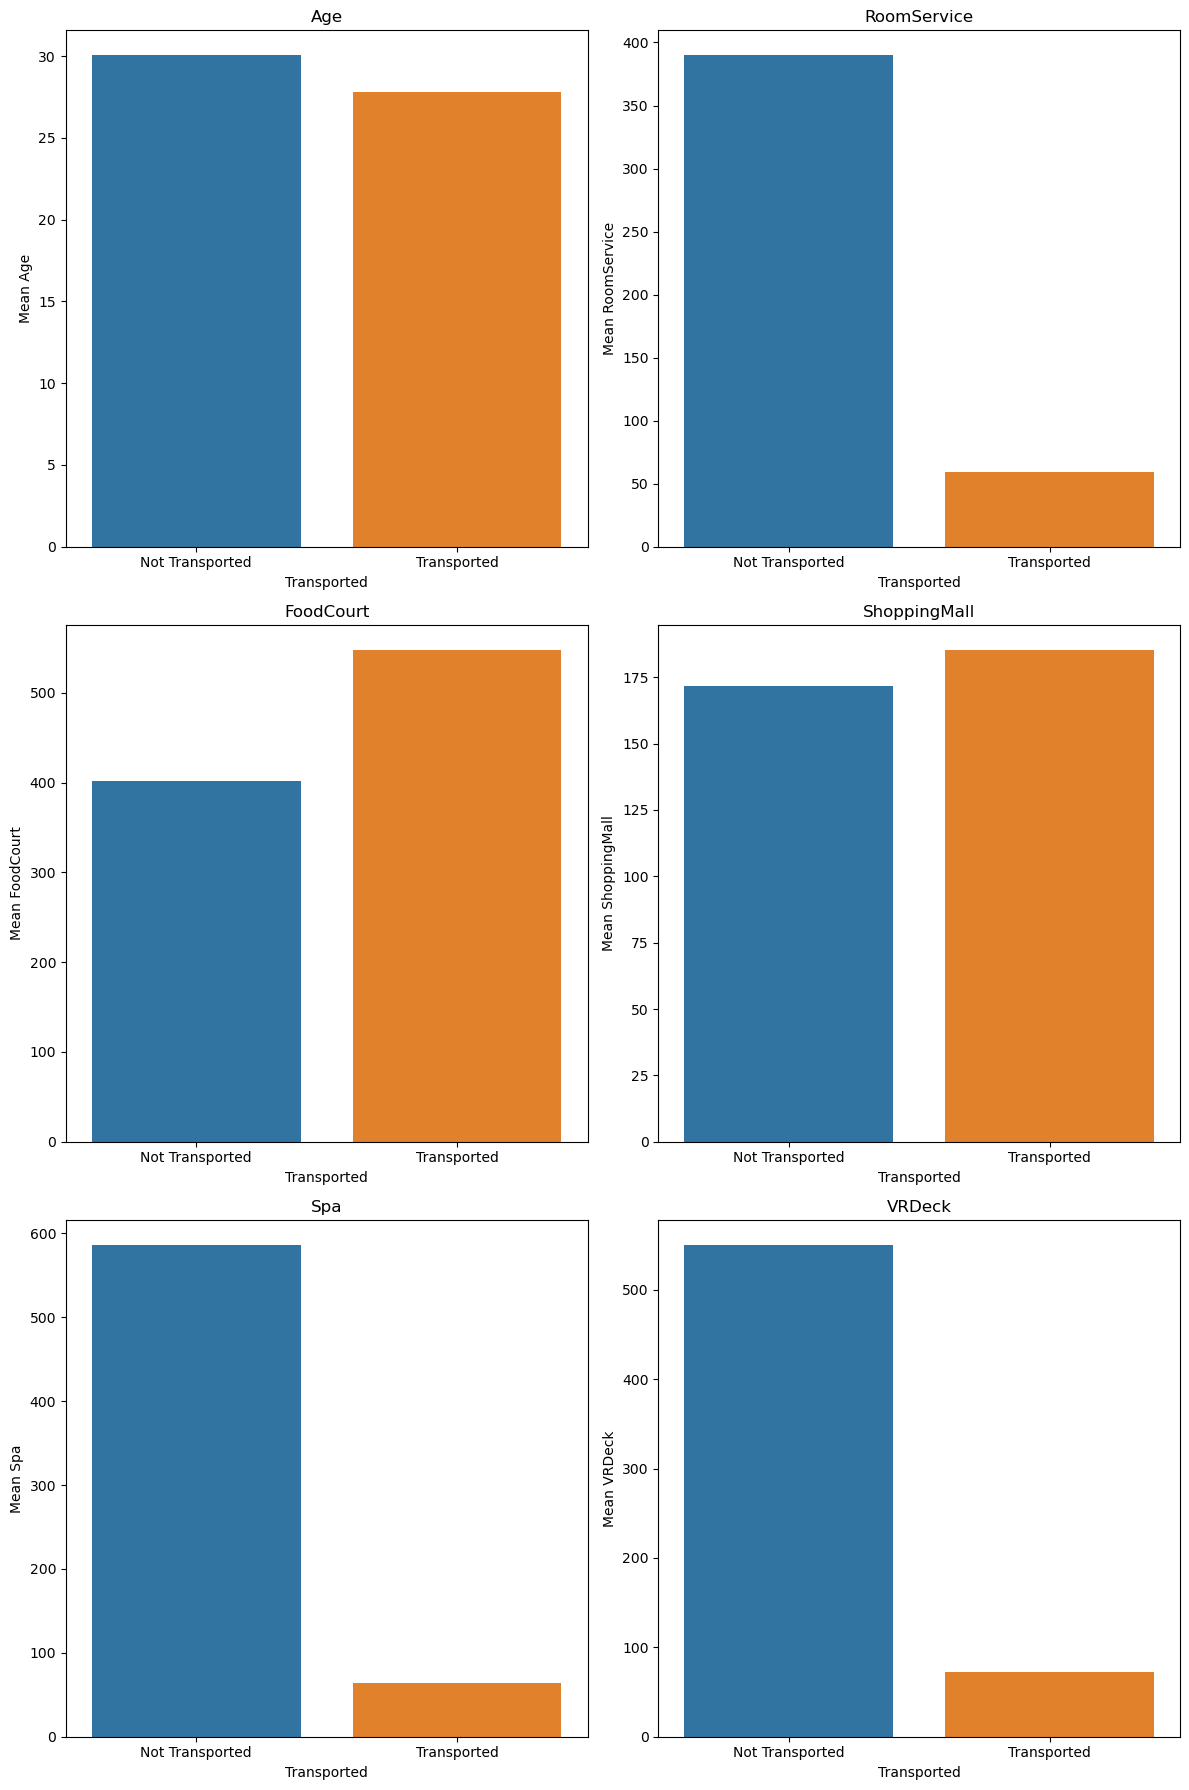

In [11]:
wrangle.comparison_of_means_visual(pd.concat([X_train, y_train], axis = 1))

In [12]:
wrangle.transported_means(X_train, y_train)

The average transported person spend on RoomService was 60.0
The average non-transported person spent on RoomService was 390.12821403752605

The average transported person spend on FoodCourt was 548.0
The average non-transported person spent on FoodCourt was 401.95308170026397

The average transported person spend on ShoppingMall was 185.0
The average non-transported person spent on ShoppingMall was 171.84051603705322

The average transported person spend on Spa was 64.0
The average non-transported person spent on Spa was 586.2179719463669

The average transported person spend on VRDeck was 72.0
The average non-transported person spent on VRDeck was 550.1273773439101



# Stats tests
> ## Comparison of means

### $H_0$: 
> * Mean of Different catagories of people who have went through the alternate dimension = 
> * Mean of Different catagories of people who have not went through the alternate dimension

### $H_\alpha$: 
> * Mean of Different catagories of people who have went through the alternate dimension != 
> * Mean of Different catagories of people who have not went through the alternate dimension

In [13]:
means_df = wrangle.comparison_of_means(pd.concat([X_train_scaled.reset_index(drop=True), y_train.reset_index(drop=True)], axis = 1))
means_df

,t_statistic,p_value,col,Moving Forward
0,6.071067,1.351031e-09,Age,Yes
1,19.683058,1.513463e-83,RoomService,Yes
2,-3.350253,8.125273e-04,FoodCourt,Yes
3,-0.784335,4.328758e-01,ShoppingMall,No
4,17.542998,3.544082e-67,Spa,Yes
5,15.896331,9.923156e-56,VRDeck,Yes


## Chi2 Tests

### $H_0$: 
> * There is no significant association or relationship between the people who were transported and the various catagorical columns


### $H_\alpha$: 
> * There is a significant association or relationship between the people who were transported and the various catagorical columns

In [14]:
chi2_df = wrangle.chi2_test(X_train, y_train)
chi2_df

,feature,chi2,p,degf,expected,Moving Forward
1,CryoSleep,1306.685014,3.985450e-286,1,"[[1841.7218588640276, 1876.2781411359724], [10...",Yes
2,VIP,4.868916,2.734467e-02,1,"[[2811.6227194492253, 2864.3772805507747], [66...",Yes
3,HomePlanet_Earth,176.194179,3.284231e-40,1,"[[1322.096729776248, 1346.903270223752], [1555...",Yes
4,HomePlanet_Europa,201.280127,1.097700e-45,1,"[[2148.8406196213427, 2189.1593803786573], [72...",Yes
5,HomePlanet_Mars,1.207499,2.718279e-01,1,"[[2285.0626506024096, 2327.9373493975904], [59...",No
6,Destination_55 Cancri e,76.025653,2.800034e-18,1,"[[2262.7717728055077, 2305.2282271944923], [61...",Yes
7,Destination_PSO J318.5-22,0.000076,9.930591e-01,1,"[[2601.0977624784855, 2649.9022375215145], [27...",No
8,Destination_TRAPPIST-1e,59.653307,1.131290e-14,1,"[[892.1304647160069, 908.8695352839931], [1985...",Yes


In [15]:
means_list = means_df.col[means_df['Moving Forward'] == 'Yes'].tolist()
chi2_list = chi2_df.feature[chi2_df['Moving Forward'] == 'Yes'].tolist()

# Exploratory summary
> * CryoSleep was the most statistically significant feature in the chi2 tests
> * Room service was the most statistically significant feature in the comparison of means tests

> * Most of the people transported were not VIP's possible reasons might include smaller sample size for
VIP's
> * People who didn't go into cryosleep had a higher percent chance of not being transported
> * People from Europa had the highest likelyhood of being transported
> * Destination_TRAPPIST-1e had the highest percent chance of being transported

> * people who were transported spent less money than people who weren't transported on average when it came to room service
> * people who were transported spent more money than people who weren't transported on average in the food court
> * people who weren't transported on average spent more money in the spa than people who were transported
> * people who weren't transported on average spent more money in the VRDeck than people who were transported

# Modeling
> - I will use my accuracy evaluation metric
> - People who have Transported make up 50 % of the data

** By guessing who has Transported one could achieve an accuracy of 50%<br>
** 50% will be the baseline accuracy I use for this project <br>
<br>
* I will be evaluating models developed using four different model types and various hyperparameter configurations<br>
* Models will be evaluated on train data<br>
* The model that performs the best will then be evaluated on test data

In [17]:
master_df, grid = wrangle.modeling_new(X_train, X_test, y_train, y_test, means_list, chi2_list)

master_df.sort_values(by ='score', ascending = False).iloc[:, 0:6].head()

KeyboardInterrupt: 

In [ ]:
master_df.sort_values(by ='score', ascending = False).iloc[:, 0:6].head(5)

In [ ]:
unseen_data = pd.read_csv('test.csv')

In [ ]:
grid

# Modeling Summary
> * Best model Random forest with a max depth of 18
> * The top model on the unseen test data beat baseline by 17%

# Conclusion
> In conclusion, individuals who refrained from entering cryosleep exhibited a notably higher probability of remaining untransported. Furthermore, those originating from Europa displayed the most significant likelihood of undergoing transportation. Notably, the destination labeled as TRAPPIST-1e emerged as having the highest percentage chance of being chosen for transportation.

# Recommendations
>To avoid the need for transportation, consider opting for a VIP ticket, which offers a 9% advantage of bypassing the transportation process. By choosing this option, you can also forego entering cryosleep and steer clear of the Destination_TRAPPIST-1e. This approach ensures a more personalized experience while eliminating the necessity for transport.

# Next Steps
> * Exploring the dataset to identify the planetary origin and destination combination with the highest proportion of transported individuals.

> * Implementing strategies for future iterations to effectively address outliers.

> * Conducting experiments with various types of scalers to enhance data preprocessing.

> * Acquiring proficiency in novel modeling techniques to broaden the array of tools available for analyzing the dataset.